In [5]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib import animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
import networkx as nx
np.set_printoptions(threshold=np.nan)

In [6]:
IPFarms=pd.read_csv("IPFarms2001",names=["Farm Number", "Infection Day"],delim_whitespace=True)
farmnuminf=IPFarms["Farm Number"].values
infday=IPFarms["Infection Day"].values
len(farmnuminf)

2026

In [7]:
CullFarms=pd.read_csv("CullFarms2001",names=["Farm Number", "Cull Day"],delim_whitespace=True)
farmnumcull=CullFarms["Farm Number"].values
cullday=CullFarms["Cull Day"].values

In [8]:
farm2001=pd.read_csv("FarmData2001",names=["County Number", "Parish Number", "Holding Number", "X Coordinate", 
                                             "Y Coordinate","Farm Area", "Number of Cattle", "Number of pigs",
                                             "Number of Sheep","Number of goats","Number of other animals"]
                     ,delim_whitespace=True)
xcoord=farm2001["X Coordinate"].values
ycoord=farm2001["Y Coordinate"].values



In [9]:
xmax=max(xcoord)
xmin=min(xcoord)
ymax=max(ycoord)
ymin=min(ycoord)
sizex = xmax-xmin
sizey = ymax-ymin

<IPython.core.display.Javascript object>


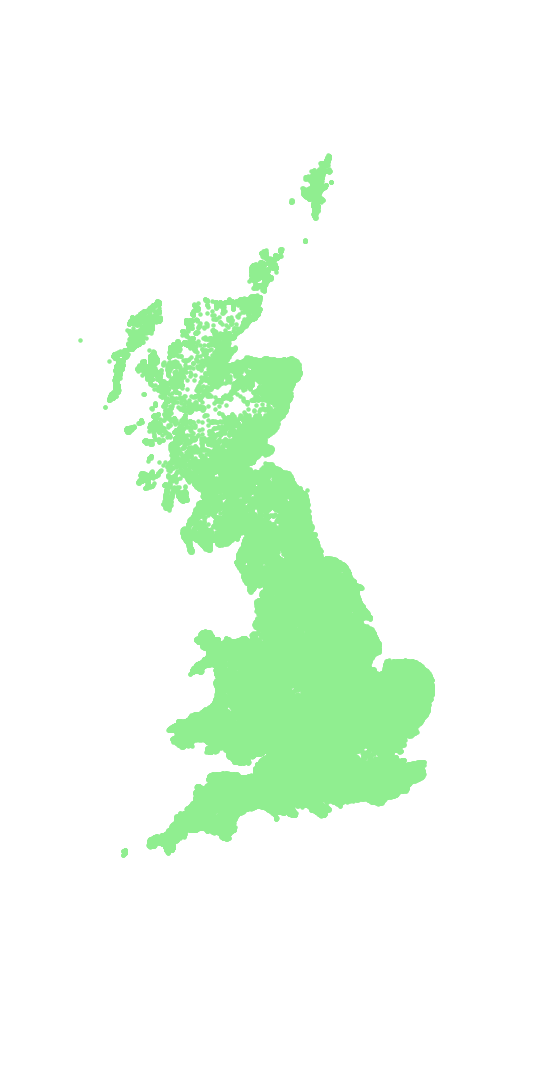

188496


KeyboardInterrupt: 

In [10]:
t=0
%matplotlib notebook

start_time = time.time()

fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111)
plt.ion

fig.show()
fig.canvas.draw()

print(np.size(xcoord))

while t<max(cullday):
    
    t = t + 1

    infected=farmnuminf[infday<=t]-1
    culled=farmnumcull[cullday<=t]-1
    
    xinfectplot=xcoord[infected]
    yinfectplot=ycoord[infected]
    xculledplot=xcoord[culled]
    yculledplot=ycoord[culled]
    ax.clear()
    
    ax.scatter(70000, 125000, c='w')
    ax.scatter(xcoord, ycoord, c='lightgreen', marker='o', s=5, label='Susceptible')
    ax.scatter(xinfectplot, yinfectplot, c='gray', marker='o', s=5, label='Infectious')
    #ax.scatter(xculledplot, yculledplot, c='r', marker='o', s=5, label='Culled')
    #ax.axis([0, sizex+10000, 0, sizey+10000])
    ax.legend()
    plt.xticks([])
    plt.yticks([])
    #plt.title('Day {},     Culled: {}'.format(t, np.size(xculledplot)))
    fig.canvas.draw()
    
print("--- %s seconds ---" % (time.time() - start_time))


In [11]:
print(np.where(farmnumcull == 4544))

(array([], dtype=int64),)


In [12]:
a = [i for i in farmnumcull if i==3434]

In [13]:
print(a)

[]


In [14]:
np.sort(farmnuminf)

array([  2955,   4453,   4757,   4849,   5473,   5655,   5794,   5795,
         5796,   5799,   6044,   6142,   6921,   7630,   7731,   9260,
         9322,  11865,  11872,  12002,  12009,  12010,  12065,  12080,
        12081,  12082,  12086,  12088,  12089,  12090,  12094,  12096,
        12097,  12098,  12099,  12100,  12104,  12105,  12108,  12110,
        12111,  12114,  12115,  12116,  12117,  12126,  12129,  12131,
        12132,  12133,  12134,  12135,  12140,  12143,  12146,  12152,
        12154,  12155,  12157,  12166,  12168,  12177,  12178,  12182,
        12185,  12186,  12187,  12189,  12197,  12202,  12208,  12215,
        12228,  12229,  12231,  12232,  12235,  12236,  12239,  12245,
        12251,  12254,  12256,  12257,  12258,  12260,  12262,  12264,
        12265,  12266,  12269,  12278,  12279,  12281,  12282,  12288,
        12289,  12290,  12291,  12292,  12295,  12296,  12298,  12302,
        12304,  12305,  12306,  12308,  12314,  12315,  12317,  12318,
      

In [15]:
np.sort(farmnumcull)

array([   528,    673,   2715,   2776,   2963,   3005,   3765,   4144,
         4711,   4848,   4853,   5469,   5576,   5609,   5752,   5793,
         5917,   5931,   6009,   6049,   6337,   6411,   6420,   6498,
         6513,   6709,   7649,   8565,   8687,   8695,   8696,   8709,
         8876,   8909,   9271,   9285,   9412,   9479,   9981,  11740,
        11753,  11790,  11826,  11864,  11867,  11879,  11885,  11981,
        12000,  12006,  12011,  12063,  12064,  12066,  12078,  12079,
        12087,  12095,  12101,  12102,  12106,  12119,  12136,  12137,
        12138,  12139,  12144,  12147,  12148,  12149,  12150,  12151,
        12159,  12161,  12163,  12165,  12169,  12170,  12171,  12172,
        12173,  12174,  12181,  12183,  12188,  12190,  12192,  12193,
        12195,  12200,  12203,  12204,  12207,  12210,  12211,  12217,
        12218,  12219,  12221,  12223,  12238,  12240,  12247,  12261,
        12263,  12270,  12271,  12272,  12274,  12275,  12276,  12280,
      

In [16]:
cumbFarms = farm2001.loc[abs(farm2001['County Number']) == 8]
cumbFarmIndex = cumbFarms.index
minNum = cumbFarmIndex[0]
cumbFarms = cumbFarms.reset_index(drop=True)

In [23]:
cumbIPFarms = IPFarms[IPFarms['Farm Number'].isin(cumbFarmIndex)]
cumbfarmnuminf=cumbIPFarms["Farm Number"]
cumbfarmnuminf = cumbfarmnuminf.reset_index(drop=True)
cumbfarmnuminf = cumbfarmnuminf.index.values
print(len(cumbfarmnuminf))

cumbinfday=cumbIPFarms["Infection Day"]
cumbinfday = cumbinfday.reset_index(drop=True)
cumbinfday = cumbinfday.values

892


In [18]:
cumbCullFarms = CullFarms[CullFarms['Farm Number'].isin(cumbFarmIndex)]
cumbfarmnumcull=cumbCullFarms["Farm Number"]
cumbfarmnumcull = cumbfarmnumcull.reset_index(drop=True)
cumbfarmnumcull = cumbfarmnumcull.index.values

cumbCullDay=cumbCullFarms["Cull Day"]
cumbCullDay = cumbCullDay.reset_index(drop=True)
cumbCullDay = cumbCullDay.values

cumbxcoord=cumbFarms["X Coordinate"].values
cumbycoord=cumbFarms["Y Coordinate"].values

cumbxmax=max(cumbxcoord)
cumbxmin=min(cumbxcoord)
cumbymax=max(cumbycoord)
cumbymin=min(cumbycoord)
cumbsizex = cumbxmax-cumbxmin
cumbsizey = cumbymax-cumbymin

numInf = np.zeros(max(cumbCullDay)+1)

<IPython.core.display.Javascript object>


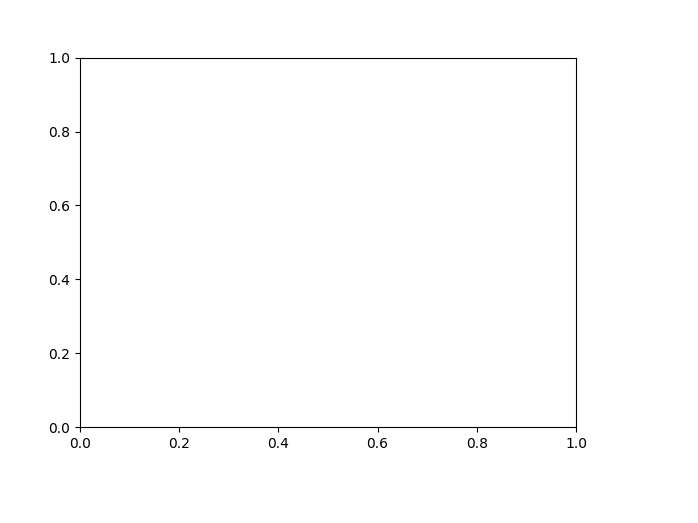

NameError: name 'cumbinfday' is not defined

In [19]:
t=0
%matplotlib notebook

start_time = time.time()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion

fig.show()
fig.canvas.draw()

while t<max(cumbCullDay):
    
    t = t + 1

    cumbinfected=cumbfarmnuminf[cumbinfday<=t]-1
    cumbculled=cumbfarmnumcull[cumbCullDay<=t]-1
    
    cumbxinfectplot=cumbxcoord[cumbinfected]
    cumbyinfectplot=cumbycoord[cumbinfected]
    cumbxculledplot=cumbxcoord[cumbculled]
    cumbyculledplot=cumbycoord[cumbculled]
    ax.clear()
    
    
    ax.scatter(cumbxcoord, cumbycoord, c='g', marker='o', s=6, label='Susceptible')
    ax.scatter(cumbxinfectplot, cumbyinfectplot, c='k', marker='o', s=10, label='Infectious')
    ax.scatter(cumbxculledplot, cumbyculledplot, c='r', marker='o', s=20, label='Culled')
    ax.axis([0, sizex, 0, sizey])
    ax.legend()
    plt.title('Day {},     Culled: {}'.format(t, np.size(cumbxculledplot)))
    fig.canvas.draw()
    
    numInf[t] = np.size(cumbinfected)
    
    
    
print("--- %s seconds ---" % (time.time() - start_time))
tvals = np.linspace(0, cumbCullDay, cumbCullDay+1)

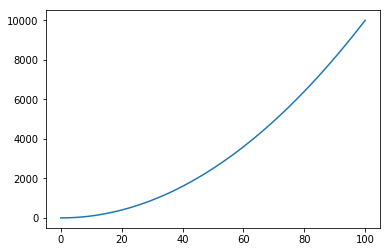

In [20]:
%matplotlib inline
a = np.linspace(0,100,101)
b = np.power(a,2)
plt.plot(a,b)

In [21]:
tvals

NameError: name 'tvals' is not defined

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

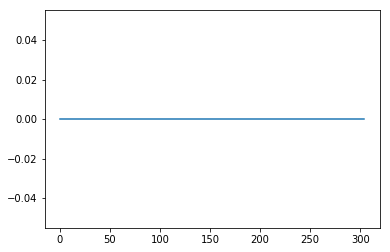

In [22]:
%matplotlib inline
np.size(numInf)
tvals = np.linspace(0, 304, 305)
plt.plot(tvals, numInf)
numInf